In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [13]:
dataset = pd.read_csv("VLagun_Phys_Years.csv")

In [14]:
dataset.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,Year_weak_wind
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,Year_weak_wind
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,Year_weak_wind
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,Year_weak_wind
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,Year_weak_wind


In [15]:
WEAK = dataset[dataset.Years == 'Year_weak_wind']
STRONG = dataset[dataset.Years == 'Year_strong_wind']

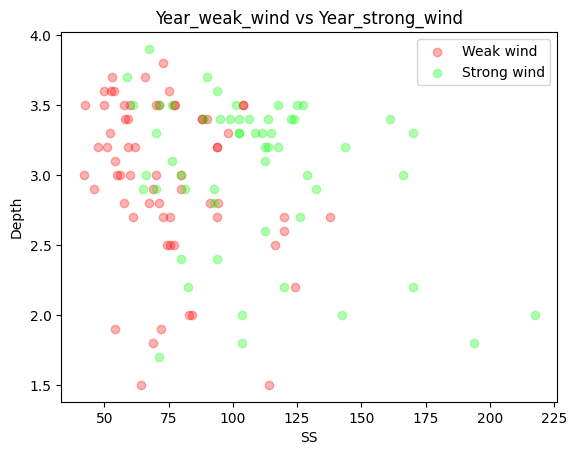

In [16]:
plt.title('Year_weak_wind vs Year_strong_wind')
plt.xlabel('SS')
plt.ylabel('Depth')
plt.scatter(WEAK.SS, WEAK.Depth, color='red', label='Weak wind', alpha=0.3)
plt.scatter(STRONG.SS, STRONG.Depth, color='lime', label='Strong wind', alpha=0.3)
plt.legend()
plt.show()

In [17]:
dataset.Years = [1 if i == 'Year_strong_wind' else 0 for i in dataset.Years]

In [18]:
x = dataset.drop(['Years'], axis=1)
y = dataset.Years.values

In [19]:
x = (x - np.min(x, axis=0) / (np.max(x, axis=0) - np.min(x, axis=0)))

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [22]:
print('Naive bayes score: ', nb.score(x_test, y_test))

Naive bayes score:  0.8888888888888888
